# ML Introduction Exercise

## Import and Load Data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
pd.options.display.max_rows = 50
url = 'https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S24/main/regression/data/Fish.csv'
fish_dataset = pd.read_csv(url)



## Preprocessing On Data

### Clean the dataset if necessary before analysis. 

In [35]:

fish_dataset.info()
fish_dataset.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [36]:
fish_dataset.describe() 


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [37]:
fish_dataset.count()

Species    159
Weight     159
Length1    159
Length2    159
Length3    159
Height     159
Width      159
dtype: int64

In [38]:
fish_dataset.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [39]:
fish_dataset.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [40]:
fish_dataset.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [41]:

fish_dataset.Species  = fish_dataset.Species.astype('category')



In [42]:
# convert species column to nnmbers each one represent a specific species
fish_dataset.Species =fish_dataset.Species.cat.codes

## Task 1

### 1 Split the dataset randomly into training (70%) and testing (30%) sets. 

In [43]:


y = fish_dataset['Weight']
x = fish_dataset[['Species','Length1', 'Length2',
       'Length3', 'Height','Width']]


x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.3, random_state=2)


In [44]:
print("Test Data = ",x_test.shape)
print("Train Data = ",x_train.shape)
print("Target Train = ",y_train.shape)
print("Target Test = ",y_test.shape)

Test Data =  (112, 6)
Train Data =  (47, 6)
Target Train =  (47,)
Target Test =  (112,)


### 2 Apply Linear Regression and Random Forest models:

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

### 3 Calculate RMSE and R²

In [46]:

# Linear Regression metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - RMSE: {rmse_lr}, R²: {r2_lr}")
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")

Linear Regression - RMSE: 134.65548391494522, R²: 0.8577278333849636
Random Forest - RMSE: 115.02763437252497, R²: 0.8961811456888672


### 4 Visualize the predictions

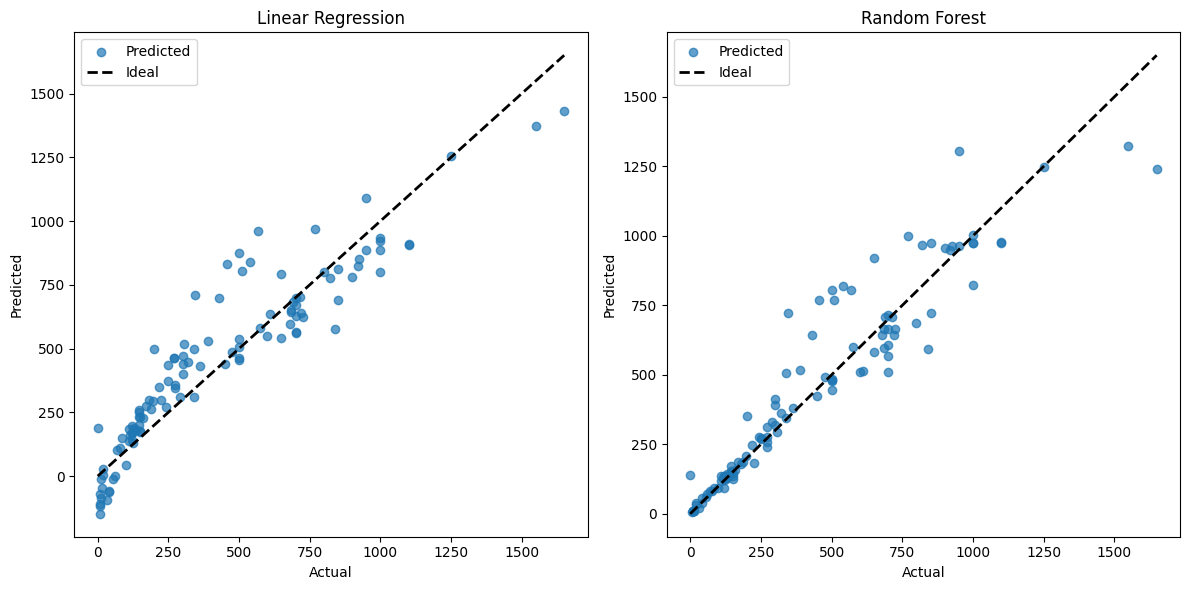

In [47]:
plt.figure(figsize=(12, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.legend()

# Random Forest plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')
plt.legend()

plt.tight_layout()
plt.show()

### 5 Provide your opinion on which metric, RMSE or R2, is more appropriate in this case.
Given the context, RMSE might be more appropriate since it provides a direct understanding of prediction accuracy in terms of grams, which is more actionable for practical purposes such as quality control or pricing in the fish industry. However, also consider R² for a holistic view of model performance.

# Task 2

### 1 Change the training-test split to ensure that each species has 70% of its samples in the training set and 30% in the test set.

In [48]:
# Initialize the StratifiedShuffleSplit with the desired train size
strat_split = StratifiedShuffleSplit(n_splits=1, train_size=0.7, random_state=2)

# Split the dataset
for train_index, test_index in strat_split.split(x, x['Species']):
    x_train = x.loc[train_index]
    x_test = x.loc[test_index]
    y_train = y.loc[train_index]
    y_test = y.loc[test_index]


### 2 Apply Linear Regression and Random Forest models:

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

### 3 Calculate RMSE and R²

In [50]:

# Linear Regression metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression - RMSE: {rmse_lr}, R²: {r2_lr}")
print(f"Random Forest - RMSE: {rmse_rf}, R²: {r2_rf}")

Linear Regression - RMSE: 107.9631058988282, R²: 0.8887091274768686
Random Forest - RMSE: 52.55417632746548, R²: 0.973629201810496


### 4 Visualize the predictions

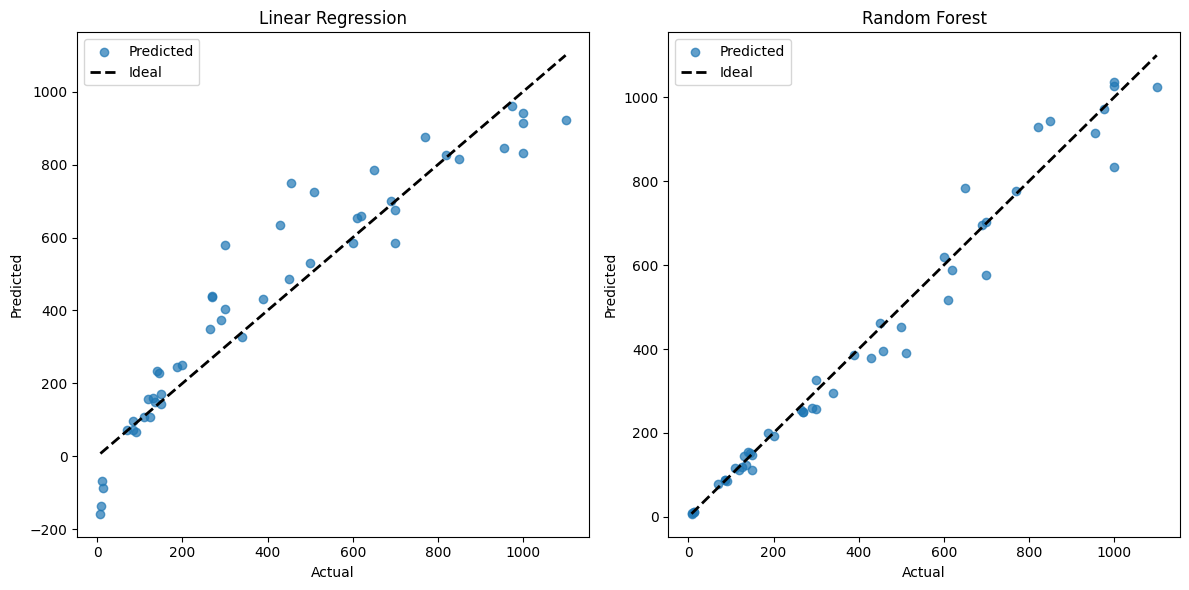

In [51]:
plt.figure(figsize=(12, 6))

# Linear Regression plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.legend()

# Random Forest plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')
plt.legend()

plt.tight_layout()
plt.show()

## Task 3

### 1 Comparison
Compare the results obtained from Task 1 and Task 2.


The RMSE  decreased in Task 2, suggesting that  model's predictions are much closer to the actual values.

The increase in R² value from Task 1 to Task 2 suggests that the model explains a higher proportion of variance in the target variable in Task 2.

The values in the graph are also much closer to the ideal line. We can therefore conclude that the distribution of the test data in task 2 leads to a better result than in task 1.
